In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f
from scipy.special import gamma, beta

In [2]:
class FDistribution:
    def __init__(self, d1, d2):
        self.d1 = d1
        self.d2 = d2

    def pdf(self, x):
        if x <= 0:
            return 0  # The F-distribution is defined only for x > 0
        coef = (self.d1 / self.d2) ** (self.d1 / 2) * (x ** (self.d1 / 2 - 1))
        beta_func = beta(self.d1 / 2, self.d2 / 2)
        denom = beta_func * ((1 + (self.d1 / self.d2) * x) ** ((self.d1 + self.d2) / 2))
        return coef / denom

    def cdf(self, x):
        return np.array([self._cdf_single(val) for val in x])

    def _cdf_single(self, x):
        # Numerical integration for the CDF using the trapezoidal rule
        pdf_vals = np.array([self.pdf(t) for t in np.linspace(0, x, 1000)])
        return np.trapz(pdf_vals, np.linspace(0, x, 1000))

def plot_pdf(x_values, pdf1, pdf2, label1, label2, title):
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, pdf1, label=label1, color='blue')
    plt.plot(x_values, pdf2, label=label2, color='red')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('PDF')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_cdf(x_values, cdf1, cdf2, label1, label2, title):
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, cdf1, label=label1, color='blue')
    plt.plot(x_values, cdf2, label=label2, color='red')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('CDF')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_comparison(x_values, pdf_scipy, pdf_custom, label1, label2, title):
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, pdf_scipy, label=label1, color='blue', linestyle='--')
    plt.plot(x_values, pdf_custom, label=label2, color='orange')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('PDF')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
# Parameters for two F-distributions (degrees of freedom for numerator and denominator)
d1_1, d2_1 = 5, 10
d1_2, d2_2 = 10, 5

# Generate x values
x_f = np.linspace(0, 5, 1000)

# Calculate PDF and CDF using scipy
pdf_f_1_scipy = f.pdf(x_f, d1_1, d2_1)
pdf_f_2_scipy = f.pdf(x_f, d1_2, d2_2)
cdf_f_1_scipy = f.cdf(x_f, d1_1, d2_1)
cdf_f_2_scipy = f.cdf(x_f, d1_2, d2_2)

# Create instances of FDistribution
f_dist_1 = FDistribution(d1_1, d2_1)
f_dist_2 = FDistribution(d1_2, d2_2)

# Calculate PDF and CDF using custom class
pdf_f_1_custom = np.array([f_dist_1.pdf(x) for x in x_f])
pdf_f_2_custom = np.array([f_dist_2.pdf(x) for x in x_f])

cdf_f_1_custom = f_dist_1.cdf(x_f)
cdf_f_2_custom = f_dist_2.cdf(x_f)

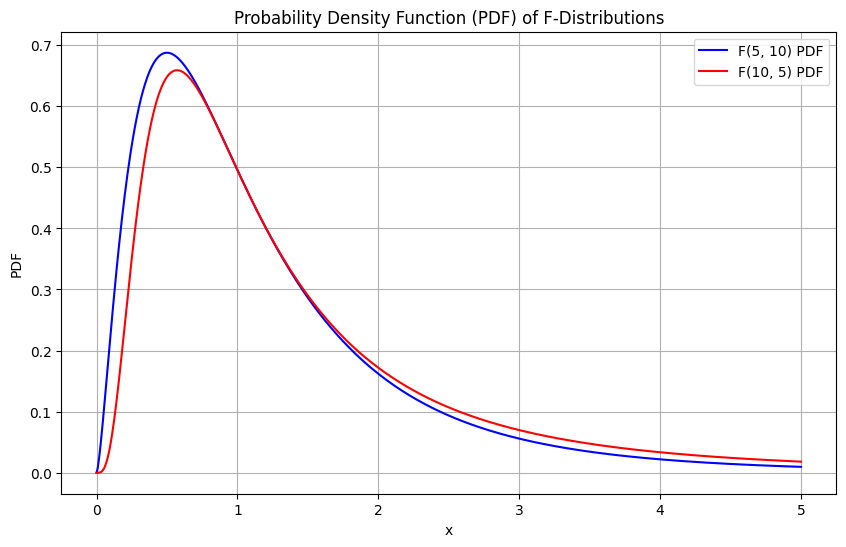

In [4]:
# Plot 1: PDF of F-Distributions (Original)
plot_pdf(x_f, pdf_f_1_scipy, pdf_f_2_scipy,
         label1=f'F({d1_1}, {d2_1}) PDF', 
         label2=f'F({d1_2}, {d2_2}) PDF',
         title='Probability Density Function (PDF) of F-Distributions')

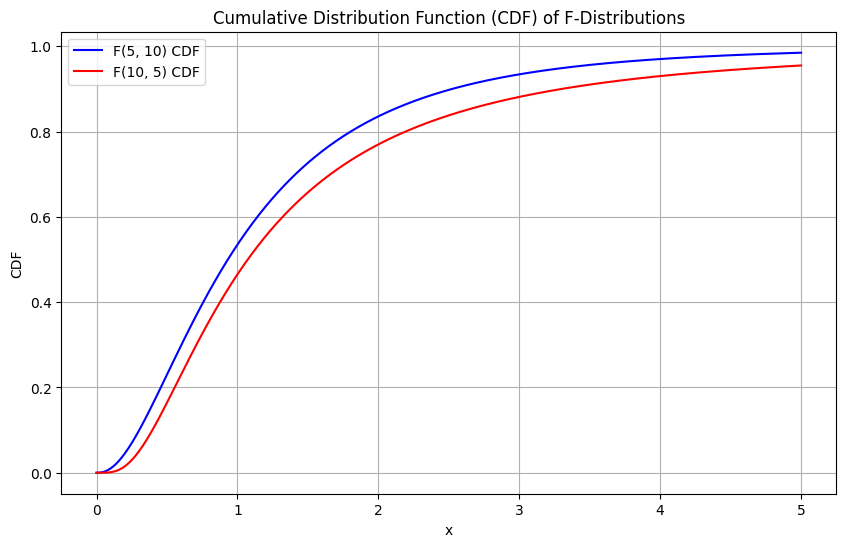

In [5]:
# Plot 2: CDF of F-Distributions (Original)
plot_cdf(x_f, cdf_f_1_scipy, cdf_f_2_scipy, 
         label1=f'F({d1_1}, {d2_1}) CDF', 
         label2=f'F({d1_2}, {d2_2}) CDF', 
         title='Cumulative Distribution Function (CDF) of F-Distributions')

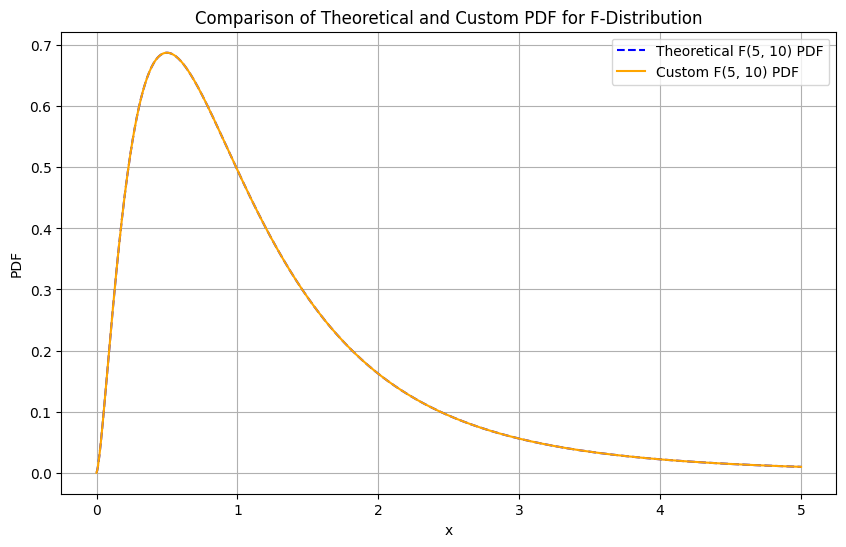

In [6]:
# Plot 3: Comparison of Theoretical and Custom PDFs
plot_comparison(x_f, pdf_f_1_scipy, pdf_f_1_custom, 
                label1=f'Theoretical F({d1_1}, {d2_1}) PDF', 
                label2=f'Custom F({d1_1}, {d2_1}) PDF', 
                title='Comparison of Theoretical and Custom PDF for F-Distribution')